##### Box plot and probability density function of a normal distribution

In [1]:
import numpy as np
import scipy
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.mlab import normpdf

prgname = 'boxplt_pdf_normdist.ipynb'

In [2]:
#create a sample dataset
# dummy data
mu = 0
sigma = 1
n_bins = 50
sdata = np.random.normal(mu, sigma, 1000)

mean = sdata.mean()
std = sdata.std()
q1, median, q3 = np.percentile(sdata,[25,50,75])
iqr = q3 - q1

print(f"Mean: {mean:.4f}")
print(f"Std: {std:.4f}")
print(f"1st quartie (Q1): {q1:.4f}")
print(f"3rd quartie (Q3): {q3:.4f}")
print(f"Inter Quartile Range (IQR): {iqr:.4f}")


Mean: -0.0111
Std: 0.9646
1st quartie (Q1): -0.6468
3rd quartie (Q3): 0.6334
Inter Quartile Range (IQR): 1.2802


-0.6468340094644326 0.002077839609582055 0.6333941571929449
0.5008289374756768
0.3989414192021822


/.pkg/qct/software/python/3.6.9/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


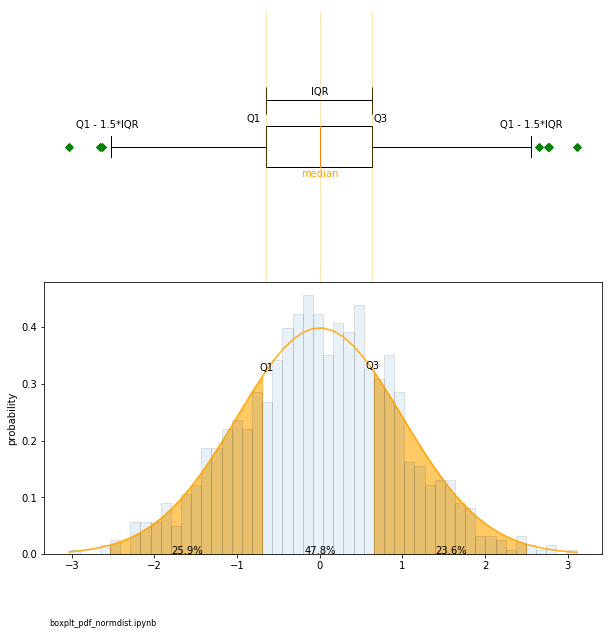

In [3]:
#plotting
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10))

#histogram
n, bins, patches = axes[1].hist(sdata, n_bins, normed=True, alpha=.1, edgecolor='black' )
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))

median, q1, q3 = np.percentile(sdata, 50), np.percentile(sdata, 25), np.percentile(sdata, 75)
print(q1, median, q3)

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#to ensure pdf and bins line up to use fill_between.
bins_1 = bins[(bins >= q1-1.5*(q3-q1)) & (bins <= q1)] # to ensure fill starts from Q1-1.5*IQR
bins_2 = bins[(bins <= q3+1.5*(q3-q1)) & (bins >= q3)]
pdf_1 = pdf[:int(len(pdf)/2)]
pdf_2 = pdf[int(len(pdf)/2):]
pdf_1 = pdf_1[(pdf_1 >= norm(mu,sigma).pdf(q1-1.5*(q3-q1))) & (pdf_1 <= norm(mu,sigma).pdf(q1))]
pdf_2 = pdf_2[(pdf_2 >= norm(mu,sigma).pdf(q3+1.5*(q3-q1))) & (pdf_2 <= norm(mu,sigma).pdf(q3))]

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
axes[1].fill_between(bins_1, pdf_1, 0, alpha=.6, color='orange')
axes[1].fill_between(bins_2, pdf_2, 0, alpha=.6, color='orange')

print(norm(mu, sigma).cdf(median))
print(norm(mu, sigma).pdf(median))

#add text to bottom graph.
axes[1].annotate("{:.1f}%".format(100*norm(mu, sigma).cdf(q1)), xy=((q1-1.5*(q3-q1)+q1)/2, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)-norm(mu, sigma).cdf(q1))), xy=(median, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+1.5*(q3-q1)-q3)-norm(mu, sigma).cdf(q3))), xy=((q3+1.5*(q3-q1)+q3)/2, 0), ha='center')
axes[1].annotate('Q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
axes[1].annotate('Q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')

axes[1].set_ylabel('probability')

#top boxplot
axes[0].boxplot(sdata, 0, 'gD', vert=False)
axes[0].axvline(median, color='orange', alpha=.6, linewidth=.5)
axes[0].axvline(q1, color='orange', alpha=.6, linewidth=.5)
axes[0].axvline(q3, color='orange', alpha=.6, linewidth=.5)
axes[0].axis('off')
axes[0].text(q1 - 1.5*iqr, 1.08, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
axes[0].text(q3 + 1.5*iqr, 1.08, 'Q1 - 1.5*IQR', ha='center', va='center', color='black')
axes[0].text(0,0.9, 'median', ha='center', va='center', color='orange')
axes[0].text(-0.8,1.1, 'Q1', ha='center', va='center', color='black')
axes[0].text(0.74,1.1, 'Q3', ha='center', va='center', color='black')
axes[0].errorbar([q1, q3], [1.17, 1.17], yerr=[-0.05, 0.05], color='black', lw=1)
axes[0].text(median, 1.2, 'IQR', ha='center', va='center', color='black')

plt.annotate(prgname, xy=(0.08,0.02), xycoords='figure fraction', ha='left',color='black',fontsize=8)
    
plt.subplots_adjust(hspace=0)
plt.show()

##### another one using simple data set

In [4]:
import numpy as np
import scipy
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
n_bins = 50
s = [8, 8, 4, 4, 1, 14, 0, 10, 1, 4, 21, 9, 5, 2, 7, 6, 7, 9, 7, 3, 3, 4, 7, 9, 9, 4, 10, 8, 10, 10, 7, 10, 1, 8, 7, 8, 1, 7, 4, 15, 8, 1, 1, 6, 7, 3, 8, 8, 8, 4]

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,10))

#histogram
n, bins, patches = axes[1].hist(s, n_bins, density=True, alpha=.1, edgecolor='black' )
data = pd.Series(s)
mu = data.mean()
sigma = data.std()
pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))
median, q1, q3 = np.percentile(s, 50), np.percentile(s, 25), np.percentile(s, 75)

#probability density function
axes[1].plot(bins, pdf, color='orange', alpha=.6)

#fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
iqr = 1.5 * (q3-q1)
x1 = np.linspace(q1 - iqr, q1)
x2 = np.linspace(q3, q3 + iqr)
pdf1 = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x1-mu)**2/(2*sigma**2))
pdf2 = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x2-mu)**2/(2*sigma**2))
axes[1].fill_between(x1, pdf1, 0, alpha=.6, color='orange')
axes[1].fill_between(x2, pdf2, 0, alpha=.6, color='orange')

#add text to bottom graph.
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q1)    -norm(mu, sigma).cdf(q1-iqr))), xy=(q1-iqr/2, 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)    -norm(mu, sigma).cdf(q1)    )), xy=(median  , 0), ha='center')
axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+iqr)-norm(mu, sigma).cdf(q3)    )), xy=(q3+iqr/2, 0), ha='center')
axes[1].annotate('q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
axes[1].annotate('q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')

axes[1].set_ylabel('Probability Density')

#top boxplot
axes[0].boxplot(s, 0, 'gD', vert=False)
axes[0].axvline(median, color='orange', alpha=.6, linewidth=.5)
axes[0].axis('off')

plt.annotate(prgname, xy=(0.08,0.02), xycoords='figure fraction', ha='left',color='black',fontsize=8)
    

Text(0.08,0.02,'boxplt_pdf_normdist.ipynb')